In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
#mpl.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import timeit
import scipy as sc

In [2]:
pwd()

'/bog/incoming/CHEESEHEAD/palm/realistic_runs'

### Check CO_2 turbulent fluxes

Read in PALM output data

In [8]:
folder = 'ches_IOP03/OUTPUT/ensemble.member.2/03.ches_IOP3.5376'
file = 'DATA_3D_NETCDF_N02slice'
ds_N02 = xr.open_dataset(folder + '/' + file)
ds_N02.close()
file = 'DATA_3D_AV_NETCDF_N03slice'
ds_N03 = xr.open_dataset(folder + '/' + file)
ds_N03.close()

In [7]:
ds_N02

<xarray.Dataset>
Dimensions:                (time: 12, x: 900, xu: 900, y: 1008, yv: 1008, zpc_3d: 4, zu_3d: 150, zw_3d: 150)
Coordinates:
  * x                      (x) float64 15.0 45.0 75.0 ... 2.696e+04 2.698e+04
  * y                      (y) float64 15.0 45.0 75.0 ... 3.02e+04 3.022e+04
  * xu                     (xu) float64 0.0 30.0 60.0 ... 2.694e+04 2.697e+04
  * yv                     (yv) float64 0.0 30.0 60.0 ... 3.018e+04 3.021e+04
  * time                   (time) timedelta64[ns] 12:30:00.255000320 ... 18:0...
  * zu_3d                  (zu_3d) float64 0.0 6.0 18.0 ... 1.77e+03 1.782e+03
  * zw_3d                  (zw_3d) float64 0.0 12.0 24.0 ... 1.776e+03 1.788e+03
  * zpc_3d                 (zpc_3d) float64 0.0 6.0 18.0 30.0
Data variables:
    E_UTM                  (x) float64 ...
    N_UTM                  (y) float64 ...
    Eu_UTM                 (xu) float64 ...
    Nu_UTM                 (y) float64 ...
    Ev_UTM                 (x) float64 ...
    Nv_UTM                 (yv) float64 ...
    lon                    (y, x) float64 ...
    lat                    (y, x) float64 ...
    lonu                   (y, xu) float64 ...
    latu                   (y, xu) float64 ...
    lonv                   (yv, x) float64 ...
    latv                   (yv, x) float64 ...
    crs                    int32 ...
    zusi                   (y, x) float64 ...
    zwwi                   (y, x) float64 ...
    u                      (time, zu_3d, y, xu) float32 ...
    v                      (time, zu_3d, yv, x) float32 ...
    w                      (time, zw_3d, y, x) float32 ...
    e                      (time, zu_3d, y, x) float32 ...
    uu                     (time, zu_3d, y, xu) float32 ...
    vv                     (time, zu_3d, yv, x) float32 ...
    ww                     (time, zw_3d, y, x) float32 ...
    uv                     (time, zu_3d, y, xu) float32 ...
    uw                     (time, zu_3d, y, xu) float32 ...
    vw                     (time, zu_3d, yv, x) float32 ...
    theta                  (time, zu_3d, y, x) float32 ...
    q                      (time, zu_3d, y, x) float32 ...
    s                      (time, zu_3d, y, x) float32 ...
    wtheta                 (time, zw_3d, y, x) float32 ...
    wq                     (time, zw_3d, y, x) float32 ...
    ws                     (time, zw_3d, y, x) float32 ...
    pcm_heatrate           (time, zpc_3d, y, x) float32 ...
    pcm_transpirationrate  (time, zpc_3d, y, x) float32 ...
    pcm_latentrate         (time, zpc_3d, y, x) float32 ...
Attributes:
    title:           PALM 21.10-rc.2  run: ches_IOP3.03  nest-id: 02  host: b...
    Conventions:     CF-1.7
    creation_time:   2022-02-25 07:44:20 -07
    data_content:    3d_av
    version:         4
    origin_time:     2019-09-24 05:00:00 +00
    origin_lat:      45.710569
    origin_lon:      -90.5842512
    origin_x:        698420.49
    origin_y:        5075931.26
    origin_z:        470.0
    rotation_angle:  0.0
    dependencies:    
    history:         
    author:          Luise Wanner, luise.wanner at kit.edu, Sreenath Paleri, ...
    contact_person:  
    institution:     IMK-IFU,Karlsruhe Institute of Technology, AOSS UW Madison
    acronym:         
    campaign:        
    location:        
    site:            
    source:          PALM 21.10-rc.2
    references:      
    keywords:        example, PALM-4U
    licence:         
    comment:         Generic crossing example
    time_avg:         1800.0 s avg
    VAR_LIST:        ;u;v;w;e;uu;vv;ww;uv;uw;vw;theta;q;s;wtheta;wq;ws;pcm_he...

### Flux plots at tower locations

In [5]:
#function to calculate temporal fluxes
def temporal_flux(ds,scalar,t,x,y):
    mean_flux = 'w'+scalar
    flux_ds = ds[mean_flux].isel(time=t).sel(x=x,y=y) - ds['w'].isel(time=t).sel(x=x,y=y)\
    *ds[scalar].isel(time=t).sel(x=x,y=y).rename({'zu_3d': 'zw_3d'}).interp_like(ds['w'].isel(time=t).sel(x=x,y=y))
    
    return(flux_ds)


CO2 flux plots from N02

(0.0, 500.0)

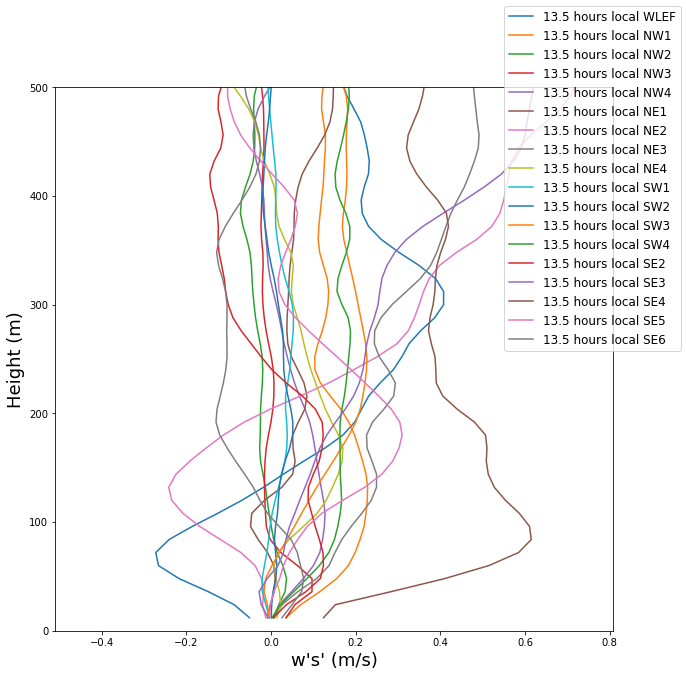

In [6]:
x_list = [13395,9525,10635,11235,11295,13455,15945,16545,16995,8025,9945,10575,12705,14115,15405,15405,16125,16845]
y_list = [15105,18075,17595,17745,18885,18255,16275,18405,16965,11745,14625,12375,14445,14145,13095,12795,14325,12285]
site_name = ['WLEF','NW1','NW2','NW3','NW4','NE1','NE2','NE3','NE4','SW1','SW2','SW3','SW4','SE2','SE3','SE4','SE5','SE6']

zw_simulated = np.asarray(ds_N02['zw_3d'])

time = 2 #half hours from data start local
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(1,1)
#loop through the each site (x,y) locations
for i, site in enumerate(site_name):
    ax.plot(temporal_flux(ds_N02,'s',time,x_list[i],y_list[i]).values,zw_simulated,'-',label=str(12.5 + time/2)+ " hours local " + site)
ax.set_ylabel('Height (m)',fontsize=18)
ax.set_xlabel("w's' (m/s)",fontsize=18)
fig.legend(fontsize=12)
plt.ylim((0., 500.))
#plt.xlim((-0.02, 0.02))

(0.0, 500.0)

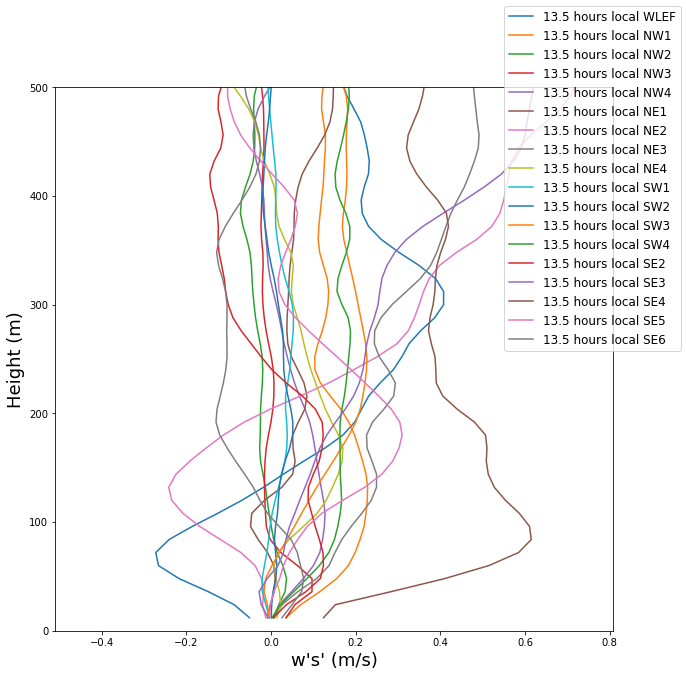

In [14]:

x_list = [13395,9525,10635,11235,11295,13455,15945,16545,16995,8025,9945,10575,12705,14115,15405,15405,16125,16845]
y_list = [15105,18075,17595,17745,18885,18255,16275,18405,16965,11745,14625,12375,14445,14145,13095,12795,14325,12285]
site_name = ['WLEF','NW1','NW2','NW3','NW4','NE1','NE2','NE3','NE4','SW1','SW2','SW3','SW4','SE2','SE3','SE4','SE5','SE6']

zw_simulated = np.asarray(ds_N02['zw_3d'])

time = 2 #half hours from data start local
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(1,1)
#loop through the each site (x,y) locations
for i, site in enumerate(site_name):
    ax.plot(temporal_flux(ds_N02,'s',time,x_list[i],y_list[i]).values,zw_simulated,'-',label=str(12.5 + time/2)+ " hours local " + site)
ax.set_ylabel('Height (m)',fontsize=18)
ax.set_xlabel("w's' (m/s)",fontsize=18)
fig.legend(fontsize=12)
plt.ylim((0., 500.))
#plt.xlim((-0.02, 0.02))


CO2 flux plots from N03

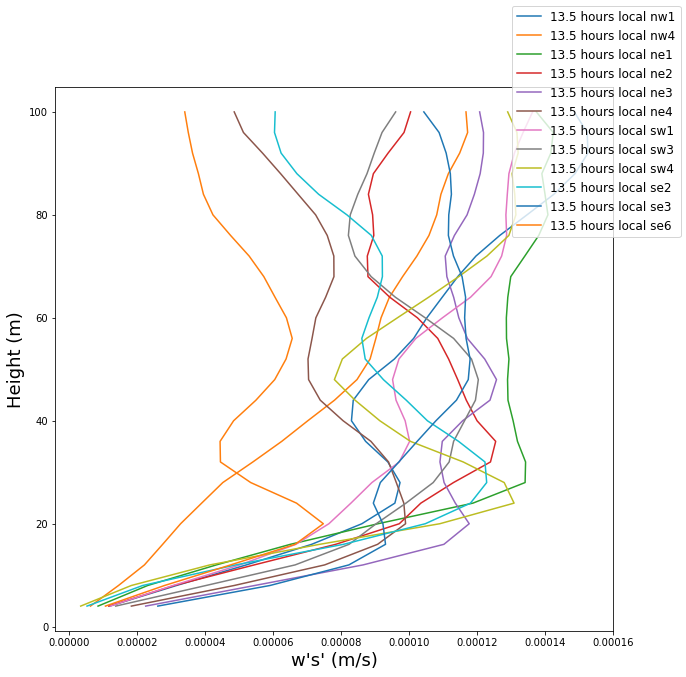

In [5]:

x_list = [2217,3981,6159,8619,9225,9669,723,3249,5391,6801,8091,9537]
y_list = [9147,9951,9309,7335,9465,8019,2799,3441,5499,5199,4161,3333]
site_name = ['nw1', 'nw4', 'ne1', 'ne2', 'ne3', 'ne4', 'sw1', 'sw3','sw4', 'se2', 'se3', 'se6']


zw_simulated = np.asarray(ds_N03['zw_3d'])

time = 2 #half hours from data start local
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(1,1)
#loop through the each site (x,y) locations
for i, site in enumerate(site_name):
    ax.plot(temporal_flux(ds_N03,'q',time,x_list[i],y_list[i]).values,zw_simulated,'-',label=str(12.5 + time/2)+ " hours local " + site)
ax.set_ylabel('Height (m)',fontsize=18)
ax.set_xlabel("w's' (m/s)",fontsize=18)
fig.legend(fontsize=12)
#plt.ylim((0., 500.))
#plt.xlim((-0.02, 0.02))
